# Analysis of ratings of apps on Google Play

In this project we will be comparing the free and paid apps on Google Play. We will compare the ratings of the free and paid apps and check if there is a statistical difference between the ratings of the free and paid apps. For this we will load the data using Pandas and pre-proecess it to remove empty or incomplete data. Then we will perform some basic analysis using SciPy to learn the statistics of the data such as mean, standard deviation, skewness, kurtosis, etc. Using this information we will check whether the data distribution is Normal or non-Normal. If the data distribution is non-Normal, we will choose an appropriate statistical test for testing our null hypothesis.

Install and import the necessary libraries. 
We will be using: 
Pandas to load and clean the data.
Numpy and scipy to perform analysis.
Matplotlib and seaborn for nice plots

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import hvplot.pandas

In [2]:
# Load data as a pandas data frame from the csv file and learn how is it structured.

In [3]:
data_path='googleplaystore.csv'

In [22]:
df = pd.read_csv(data_path)

In [23]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [24]:
# The data has 10841 rows and 13 columns. 
# The 'Rating' column has only 9367 rows that are not NaN.

# The 'Reviews' column is not numeric but string. 
# We need to clean this data set to change these to numeric values.

# The 'Price' and 'Installation' columns also needs to be changed to numeric.

In [25]:
# dataset cleaning

# Select rows in 'Rating' column that are not 'NaN'.

df = df.dropna()

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9360 non-null   object 
 1   Category        9360 non-null   object 
 2   Rating          9360 non-null   float64
 3   Reviews         9360 non-null   object 
 4   Size            9360 non-null   object 
 5   Installs        9360 non-null   object 
 6   Type            9360 non-null   object 
 7   Price           9360 non-null   object 
 8   Content Rating  9360 non-null   object 
 9   Genres          9360 non-null   object 
 10  Last Updated    9360 non-null   object 
 11  Current Ver     9360 non-null   object 
 12  Android Ver     9360 non-null   object 
dtypes: float64(1), object(12)
memory usage: 1023.8+ KB


In [27]:
# The reviews column is not numeric but string. 
df['Reviews'] = pd.to_numeric(df['Reviews'])

# The 'Price' column contains '$' symbol for paid apps. 
# Let's replace this symbol and convert 'Price' to numeric.
# Let's also remove the ',' and '+' sign from number of installs 
# and convert the column to numeric.
df['Price'] = df['Price'].apply(lambda x: float(x.replace('$','')))
df['Installs'] = df['Installs'].apply(lambda y: y.replace('+','').replace(',',''))
df = df[df['Installs'].astype(str).str.isnumeric()]
df['Installs'] = pd.to_numeric(df['Installs'])

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9360 non-null   object 
 1   Category        9360 non-null   object 
 2   Rating          9360 non-null   float64
 3   Reviews         9360 non-null   int64  
 4   Size            9360 non-null   object 
 5   Installs        9360 non-null   int64  
 6   Type            9360 non-null   object 
 7   Price           9360 non-null   float64
 8   Content Rating  9360 non-null   object 
 9   Genres          9360 non-null   object 
 10  Last Updated    9360 non-null   object 
 11  Current Ver     9360 non-null   object 
 12  Android Ver     9360 non-null   object 
dtypes: float64(2), int64(2), object(9)
memory usage: 1023.8+ KB


# Data Analysis
The goal of this project is to compare average rating of paid and unpaid apps and check if there is a statistically significant difference between the two types of apps based on the ratings. We will use Bayesian analysis to check for this differece. For this we will divide the data into two dataframes: paid and unpaid. 
We will remove the apps that have zero or few reviews. This is because many apps might have no reviews and that would bias the data. Also, the developers might have written some reviews to test the app/review process. So, we will put a threshold of TT = 10 for selecting the apps.

In [29]:
# Creating two datasets: One for paid apps and one for free apps
# Also not including apps with less than TT = 10 reviews.

TT = 10 # Threshold for choosing minimum number of apps
df_free = df[(df['Price'] == 0) & (df['Reviews']>=TT)]
df_paid = df[(df['Price'] != 0) & (df['Reviews']>=TT)]

In [31]:
print(f'Total number of free apps with TT and more reviews is {df_free.shape[0]}')
print(f'Total number of paid apps with TT and more reviews is {df_paid.shape[0]}')

Total number of free apps with TT and more reviews is 8197
Total number of paid apps with TT and more reviews is 567


We can see that Google Play Store has more free apps than paid apps. For analysis we choose a random sample size from both paid and free apps to reduce the bias.

In [32]:
NSample = 200
df_free_resampled = df_free.sample(NSample)
df_paid_resampled = df_paid.sample(NSample)

Lets make a histogram of the data to compare the two datasets.

Text(0, 0.5, 'Frequency')

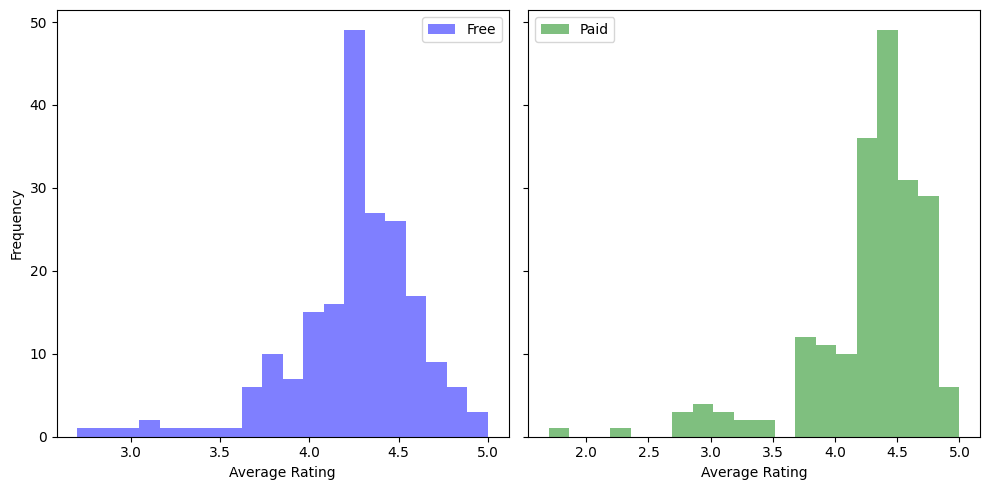

In [36]:
bin_nums = 20
fig, axs = plt.subplots(1, 2, figsize=(10,5), sharey =True, tight_layout = False)
axs[0].hist(df_free_resampled['Rating'], bins = bin_nums, label = 'Free', alpha = 0.5, color = 'blue')
axs[1].hist(df_paid_resampled['Rating'], bins = bin_nums, label = 'Paid', alpha = 0.5, color = 'green')

axs[0].legend()
axs[1].legend()
axs[0].set_xlabel('Average Rating')
axs[1].set_xlabel('Average Rating')
axs[0].set_ylabel('Frequency')

From looking at the histograms one can say that the two distributions are quite different. The paid apps seems to have a higher rating on average. We can check the mean, variance and other such statics to confirm this observation.

We can also see that the distributions are not Gaussian. We can check the non Gausiannnity by looking at skewness and kurtosis of the distribution.


In [41]:
print('Statistics of the distributions of average rating of paid and free apps.')
stat_free = stats.describe(df_free_resampled['Rating'])
stat_paid = stats.describe(df_paid_resampled['Rating'])

print(f'Free app stats: Mean: {stat_free.mean}; Standard Deviation: {np.sqrt(stat_free.variance)}; Skewness: {stat_free.skewness};  Kurtosis: {stat_free.kurtosis}')
print(f'Paid app stats: Mean: {stat_paid.mean}; Standard Deviation: {np.sqrt(stat_paid.variance)}; Skewness: {stat_paid.skewness};  Kurtosis: {stat_paid.kurtosis}')

Statistics of the distributions of average rating of paid and free apps.
Free app stats: Mean: 4.251; Standard Deviation: 0.368753161982866; Skewness: -1.2703867445725285;  Kurtosis: 2.710442647068265
Paid app stats: Mean: 4.2855; Standard Deviation: 0.5065795735337223; Skewness: -1.9783177928354545;  Kurtosis: 5.024624385974613


Since the Skewness is moderate (~1) and the Kurtosis is high (>3), we can conclude that both the distributions are non normal. We will use a non-normal test Mann-Whitney U test for statistcal analysis.

In [43]:
st_mw_test = stats.mannwhitneyu(df_free_resampled['Rating'], df_paid_resampled['Rating'])
print(f'Results of Mann-Whitney U test: \n p = {st_mw_test.pvalue}; \n statistic = {st_mw_test.statistic}')

Results of Mann-Whitney U test: 
 p = 0.008738881457818301; 
 statistic = 16982.5


The p-value of the Mann-Whitney test is lower than 1%, which means that the difference between the mean of the two samples is not by chance. The difference is significant, and hence we can reject the null hypothesis that the two samples come from the same distribution.

/usr/local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_conte

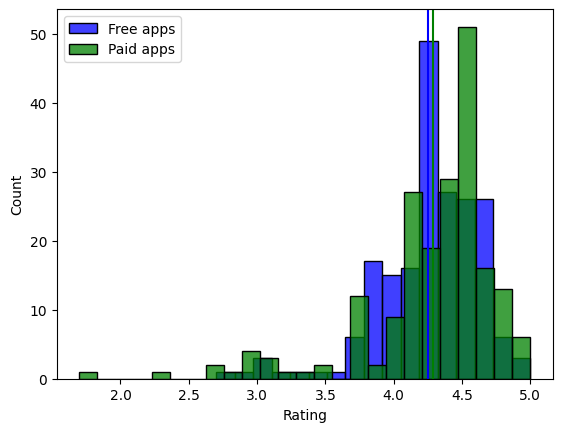

In [46]:
# Histogram of rating distribution of free and paid apps samples, vertical lines represent average values
# each distribution
sns.histplot(df_free_resampled['Rating'], kde = False, label = 'Free apps', color ='blue')
sns.histplot(df_paid_resampled['Rating'], kde = False, label = 'Paid apps', color = 'green')
plt.legend()
plt.axvline(stat_free.mean, color ='blue')
plt.axvline(stat_paid.mean, color ='green')

On further analysis we can find what are the popular categories of paid and free apps.

/usr/local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


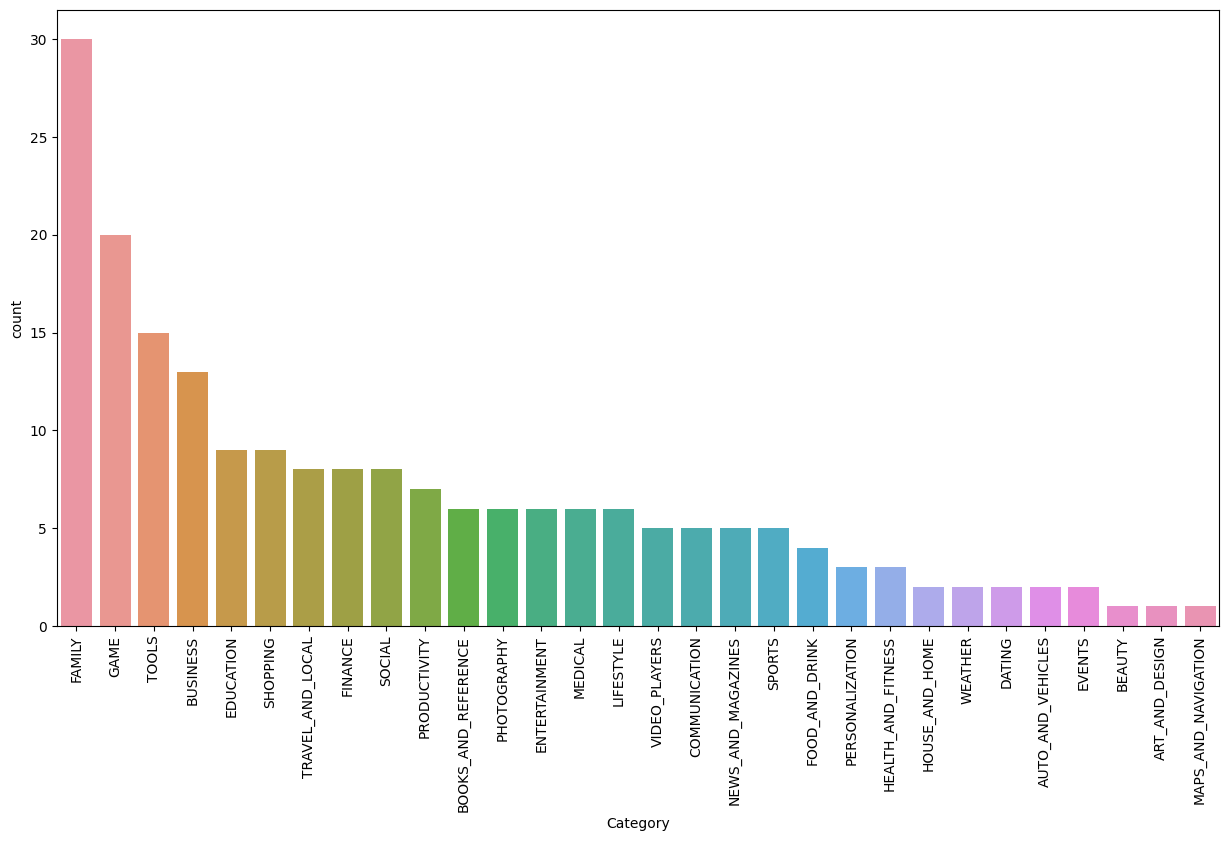

In [48]:
#Free apps categoty histogram
plt.figure(figsize=(15,8));
sns.countplot(x=df_free_resampled['Category'], order = df_free_resampled['Category'].value_counts().index);
plt.xticks(rotation=90);

/usr/local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, 'FAMILY'),
  Text(1, 0, 'MEDICAL'),
  Text(2, 0, 'GAME'),
  Text(3, 0, 'PERSONALIZATION'),
  Text(4, 0, 'TOOLS'),
  Text(5, 0, 'COMMUNICATION'),
  Text(6, 0, 'PHOTOGRAPHY'),
  Text(7, 0, 'PRODUCTIVITY'),
  Text(8, 0, 'SPORTS'),
  Text(9, 0, 'LIFESTYLE'),
  Text(10, 0, 'HEALTH_AND_FITNESS'),
  Text(11, 0, 'WEATHER'),
  Text(12, 0, 'BUSINESS'),
  Text(13, 0, 'BOOKS_AND_REFERENCE'),
  Text(14, 0, 'FINANCE'),
  Text(15, 0, 'MAPS_AND_NAVIGATION'),
  Text(16, 0, 'EDUCATION'),
  Text(17, 0, 'TRAVEL_AND_LOCAL'),
  Text(18, 0, 'ART_AND_DESIGN'),
  Text(19, 0, 'VIDEO_PLAYERS'),
  Text(20, 0, 'FOOD_AND_DRINK'),
  Text(21, 0, 'NEWS_AND_MAGAZINES'),
  Text(22, 0, 'SOCIAL'),
  Text(23, 0, 'ENTERTAINMENT'),
  Text(24, 0, 'DATING')])

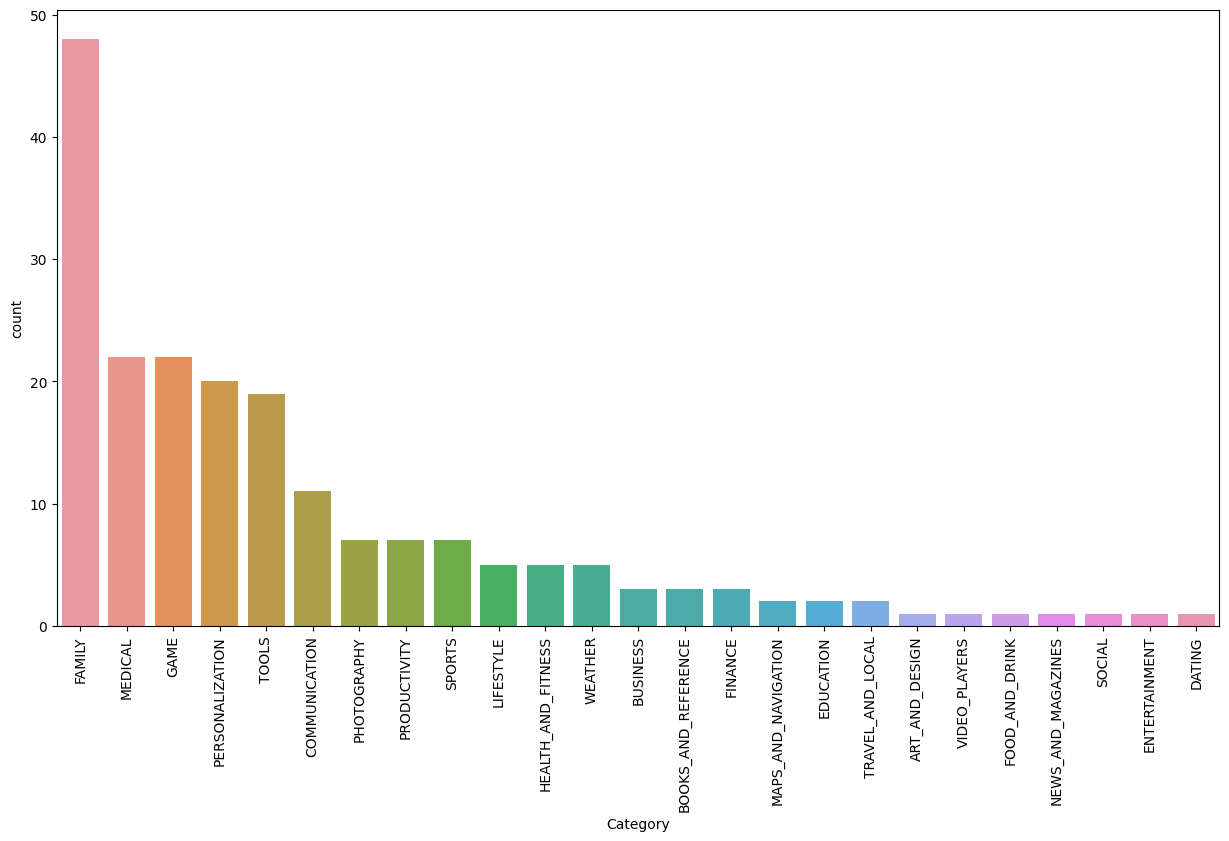

In [49]:
#Free apps categoty histogram
plt.figure(figsize=(15,8))
sns.countplot(x=df_paid_resampled['Category'], order = df_paid_resampled['Category'].value_counts().index)
plt.xticks(rotation=90)